In [1]:
#  Importing the pandas, numpy, matplotlib, seaborn libraries as pd, np, plt and sns respectivelyy. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# from library.sb_utils import save_file

# from library.sb_utils import save_file

In [2]:
pwd

'H:\\DataCamp\\Capstone2'

In [3]:
# loading the spotify data file 
# spotify_data = pd.read_csv('H:/DataCamp/Capstone2/Spotify_datases/data.csv')
spotify_data = pd.read_csv('H:/DataCamp/Capstone2/Spotify_datases/data.csv')
# print(spotify_data.head())
spotify_data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [4]:
# Looking for shape of each dataset
spotify_data.shape

(174389, 19)

In [5]:
# see a information of the data
spotify_data.info()
spotify_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [6]:
# seeing the type of columns in the data file
spotify_data.dtypes
# Converting release_date to date_time
spotify_data["release_date"]= pd.to_datetime(spotify_data["release_date"])
spotify_data.dtypes

acousticness               float64
artists                     object
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                          object
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                        object
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
valence                    float64
year                         int64
dtype: object

In [7]:
# Removing brackets and single and double inverted commas from artists column
spotify_data['artists']= spotify_data['artists'].str.replace('"', '')
spotify_data['artists']= spotify_data['artists'].str.replace("'", '')
spotify_data['artists'] = spotify_data['artists'].str.strip('[]').astype(object)

spotify_data.head()
# spotify_data.dtypes

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920-01-01,0.0936,149.976,0.6340,1920
1,0.643000,Screamin Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920-01-01,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [8]:
# If rows containing duplicate data removing them
spotify_duplicate_rows_df = spotify_data[spotify_data.duplicated()]
print('number of duplicate rows: ', spotify_duplicate_rows_df.shape)


number of duplicate rows:  (2159, 19)


In [9]:
spotify_data.shape

(174389, 19)

In [10]:
spotify_data.count()

acousticness        174389
artists             174389
danceability        174389
duration_ms         174389
energy              174389
explicit            174389
id                  174389
instrumentalness    174389
key                 174389
liveness            174389
loudness            174389
mode                174389
name                174389
popularity          174389
release_date        174389
speechiness         174389
tempo               174389
valence             174389
year                174389
dtype: int64

In [11]:
# Dropping duplicate data from the main dataset
spotify_df = spotify_data.drop_duplicates()
spotify_df.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920-01-01,0.0936,149.976,0.6340,1920
1,0.643000,Screamin Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920-01-01,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [12]:
# Checking for null values
spotify_df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [13]:
spotify_df.shape

(172230, 19)

In [14]:
# spotify_df.value_counts()

In [15]:
spotify_df.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,172230.0,0.501914,0.379394,0.0,0.09130,0.523000,0.896,0.996
danceability,172230.0,0.536246,0.175858,0.0,0.41400,0.547000,0.668,0.988
duration_ms,172230.0,232671.829002,147176.791022,4937.0,166200.00000,205717.500000,265600.000,5338302.000
energy,172230.0,0.480989,0.272032,0.0,0.24800,0.463000,0.708,1.000
explicit,172230.0,0.067956,0.251670,0.0,0.00000,0.000000,0.000,1.000
instrumentalness,172230.0,0.194968,0.332974,0.0,0.00000,0.000498,0.238,1.000
key,172230.0,5.204395,3.517851,0.0,2.00000,5.000000,8.000,11.000
liveness,172230.0,0.211396,0.180661,0.0,0.09930,0.138000,0.270,1.000
loudness,172230.0,-11.777780,5.690105,-60.0,-14.93575,-10.867000,-7.532,3.855
mode,172230.0,0.703147,0.456873,0.0,0.00000,1.000000,1.000,1.000


<AxesSubplot:>

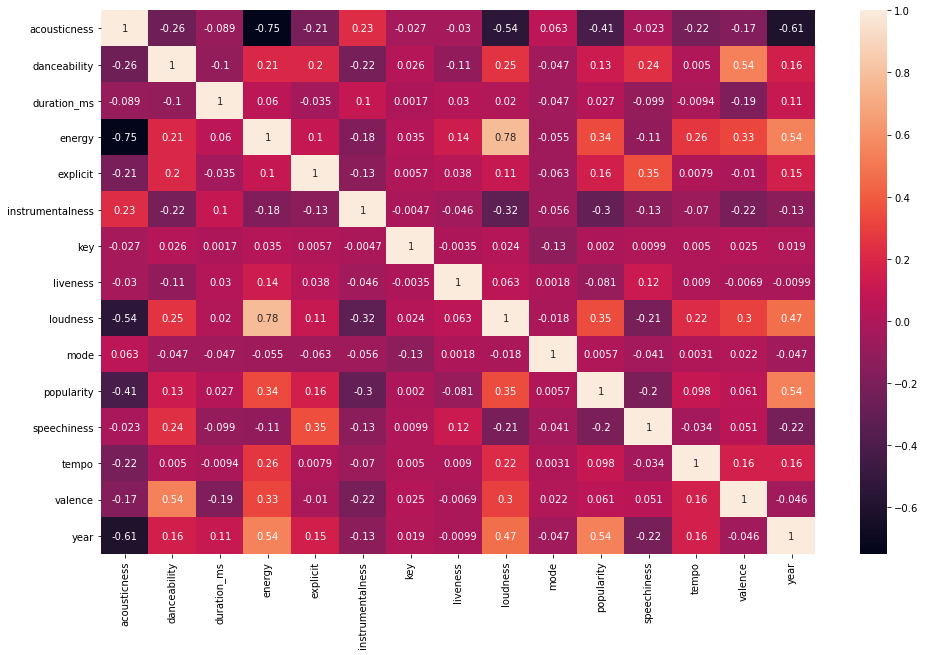

In [16]:
# plt.matshow(spotify_data.corr())
# plt.show()
corr1=spotify_df.corr()
# corr1.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)
# Make a heatmap of the data 
plt.figure(figsize = (16,10))
sns.heatmap(corr1, xticklabels=corr1.columns, yticklabels=corr1.columns, annot=True)

In [17]:
# covMatrix= pd.DataFrame.cov(spotify_df)
# plt.figure(figsize = (16,10))
# sns.heatmap(covMatrix, annot=True, fmt='g')
# # plt.show()

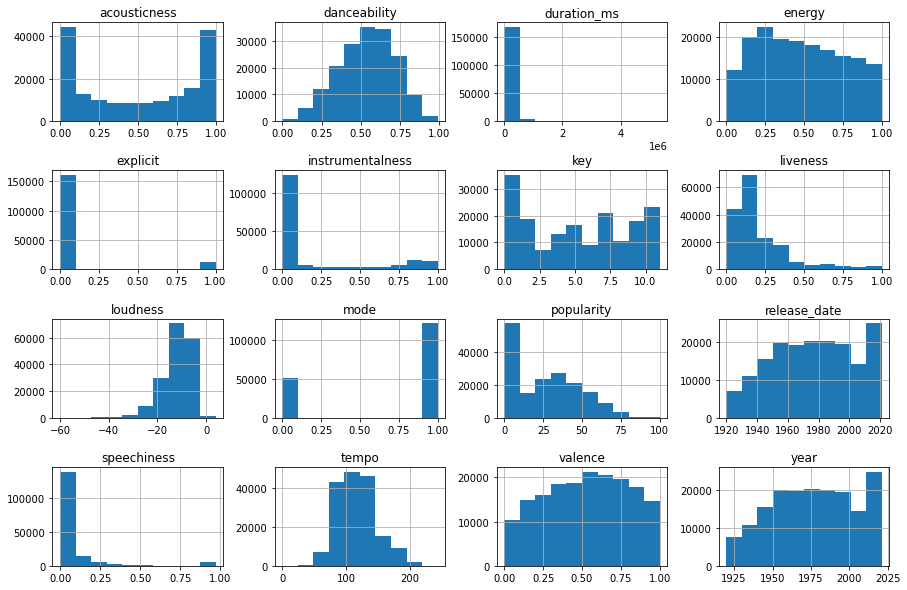

In [18]:
# Making a histogram of the quality variable.
# sns.histplot(spotify_data,bins=10)
# Make a pairplot of the wine data
# sns.pairplot(spotify_df)
# plt.figure(figsize = (20,20))
# hist = spotify_df.hist(bins=20)
plt.subplots_adjust(hspace=0.5);
spotify_df.hist(figsize=(15,10))
# plt.show()
# for i, col in enumerate(spotify_data.columns):
#     plt.figure(i)
#     sns.countplot(x=col, data=spotify_data)

In [19]:
# sns.boxplot(x="variable", y="value", data=pd.melt(spotify_df))
# spotify_df.plot(kind='box')
# plt.show()
# plt.show()

C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<AxesSubplot:xlabel='mode', ylabel='Density'>

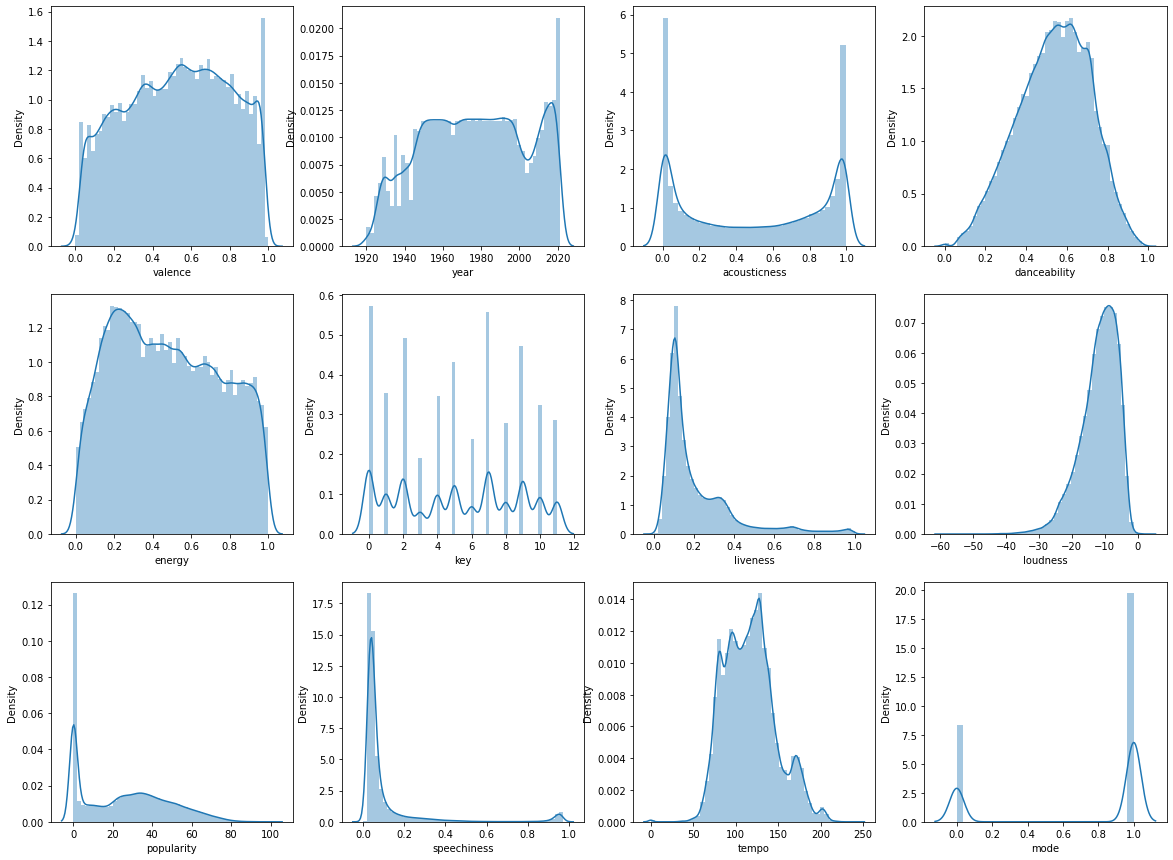

In [20]:
df=spotify_df
fig,ax = plt.subplots(3,4,figsize=(20,15))

sns.distplot(df['valence'],ax=ax[0,0])
sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['acousticness'],ax=ax[0,2])
sns.distplot(df['danceability'],ax=ax[0,3])
sns.distplot(df['energy'],ax=ax[1,0])
sns.distplot(df['key'],ax=ax[1,1])
sns.distplot(df['liveness'],ax=ax[1,2])
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0])
sns.distplot(df['speechiness'],ax=ax[2,1])
sns.distplot(df['tempo'],ax=ax[2,2])
sns.distplot(df['mode'],ax=ax[2,3])

C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\User

<AxesSubplot:xlabel='mode'>

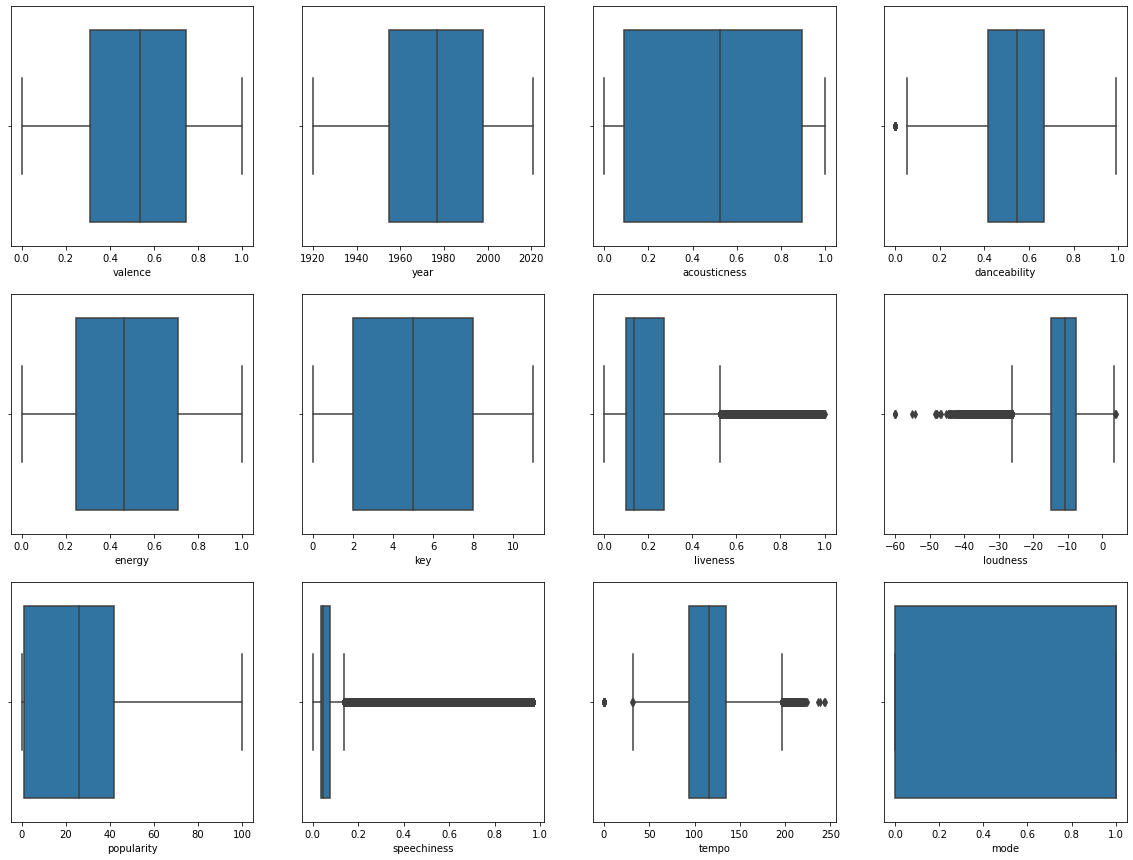

In [21]:
df=spotify_df
fig,ax = plt.subplots(3,4,figsize=(20,15))
sns.boxplot(df['valence'],ax=ax[0,0])
sns.boxplot(df['year'],ax=ax[0,1])
sns.boxplot(df['acousticness'],ax=ax[0,2])
sns.boxplot(df['danceability'],ax=ax[0,3])
sns.boxplot(df['energy'],ax=ax[1,0])
sns.boxplot(df['key'],ax=ax[1,1])
sns.boxplot(df['liveness'],ax=ax[1,2])
sns.boxplot(df['loudness'],ax=ax[1,3])
sns.boxplot(df['popularity'],ax=ax[2,0])
sns.boxplot(df['speechiness'],ax=ax[2,1])
sns.boxplot(df['tempo'],ax=ax[2,2])
sns.boxplot(df['mode'],ax=ax[2,3])

In [22]:
# #  The features we are imp
# plt.subplots(figsize=(12, 8))
# sns.boxplot(x='loudness', y='energy', hue='popularity', data=spotify_df)
# plt.xticks(rotation='vertical')
# plt.ylabel('loudness')
# plt.xlabel('energy');

In [23]:
x=spotify_df[['valence','acousticness','danceability','energy','key','liveness','loudness','popularity','tempo','mode','speechiness','instrumentalness']]
spotify_pca = PCA().fit(x)

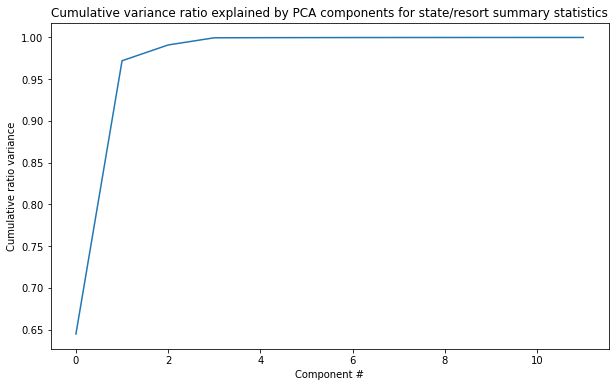

In [24]:
plt.subplots(figsize=(10, 6))
plt.plot(spotify_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [25]:
spotify_x = spotify_pca.transform(x)
spotify_x.shape

(172230, 12)

In [26]:
# x1 = spotify_x[:, 0]
# y = spotify_x[:, 1]
# # state = state_summary_index
# pc_var = 100 * spotify_pca.explained_variance_ratio_.cumsum()[1]
# plt.subplots(figsize=(10,8))
# plt.scatter(x=x1, y=y)
# plt.xlabel('First component')
# plt.ylabel('Second component')
# plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
# # for s, x, y in zip(state, x, y):

C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'drivers license'),
  Text(1, 0, 'Mood (feat. iann dior)'),
  Text(2, 0, 'positions'),
  Text(3, 0, '34+35'),
  Text(4, 0, 'LA NOCHE DE ANOCHE'),
  Text(5, 0, 'Therefore I Am'),
  Text(6, 0, 'WITHOUT YOU'),
  Text(7, 0, 'Whoopty'),
  Text(8, 0, 'DÁKITI'),
  Text(9, 0, 'you broke me first'),
  Text(10, 0, 'What You Know Bout Love'),
  Text(11, 0, 'Anyone'),
  Text(12, 0, "Hecha Pa' Mi"),
  Text(13, 0, 'Lonely (with benny blanco)'),
  Text(14, 0, 'The Business')])

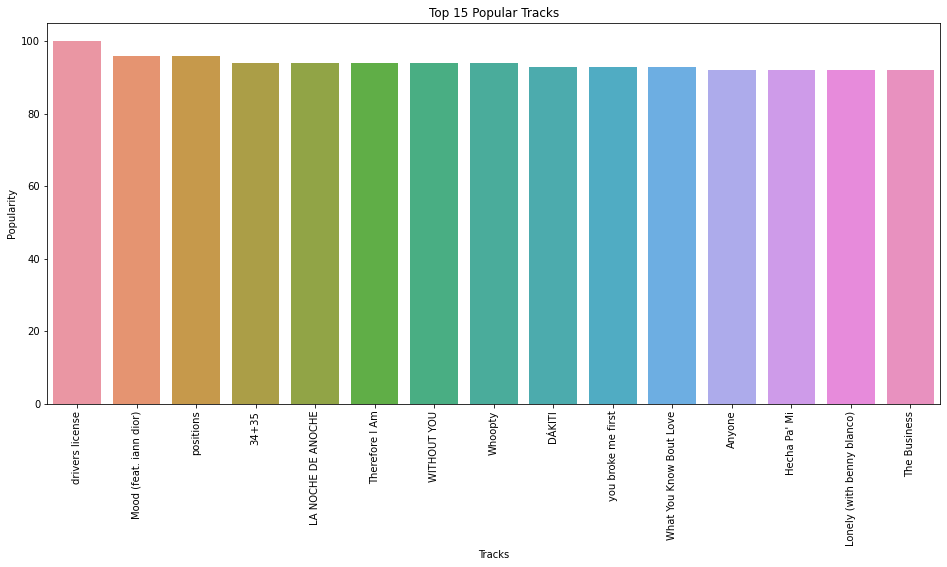

In [27]:
fig, axis = plt.subplots(figsize = (16,7))
popular = spotify_df.groupby('name')['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular.index,popular)
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '24kGoldn, iann dior'),
  Text(1, 0, 'CJ'),
  Text(2, 0, 'Bad Bunny, ROSALÍA'),
  Text(3, 0, 'Bad Bunny, Jhay Cortez'),
  Text(4, 0, 'Boza'),
  Text(5, 0, 'Cardi B, Megan Thee Stallion'),
  Text(6, 0, 'Justin Bieber, benny blanco'),
  Text(7, 0, 'DaBaby, Roddy Ricch'),
  Text(8, 0, 'Myke Towers, Juhn'),
  Text(9, 0, 'Joel Corry, MNEK'),
  Text(10, 0, 'Manuel Turizo, Rauw Alejandro, Myke Towers'),
  Text(11, 0, 'Pop Smoke, Lil Baby, DaBaby'),
  Text(12, 0, 'HVME'),
  Text(13, 0, 'Sech, Daddy Yankee, J Balvin, ROSALÍA, Farruko'),
  Text(14, 0, 'MEDUZA, Dermot Kennedy')])

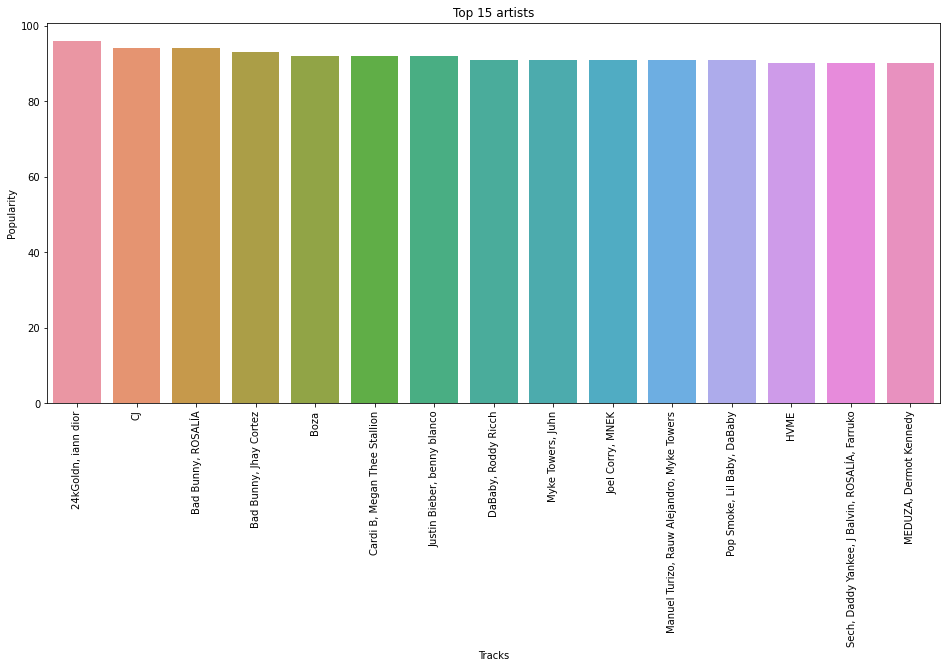

In [28]:
fig, axis = plt.subplots(figsize = (16,7))
popular = spotify_df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular.index,popular)
axis.set_title('Top 15 artists')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

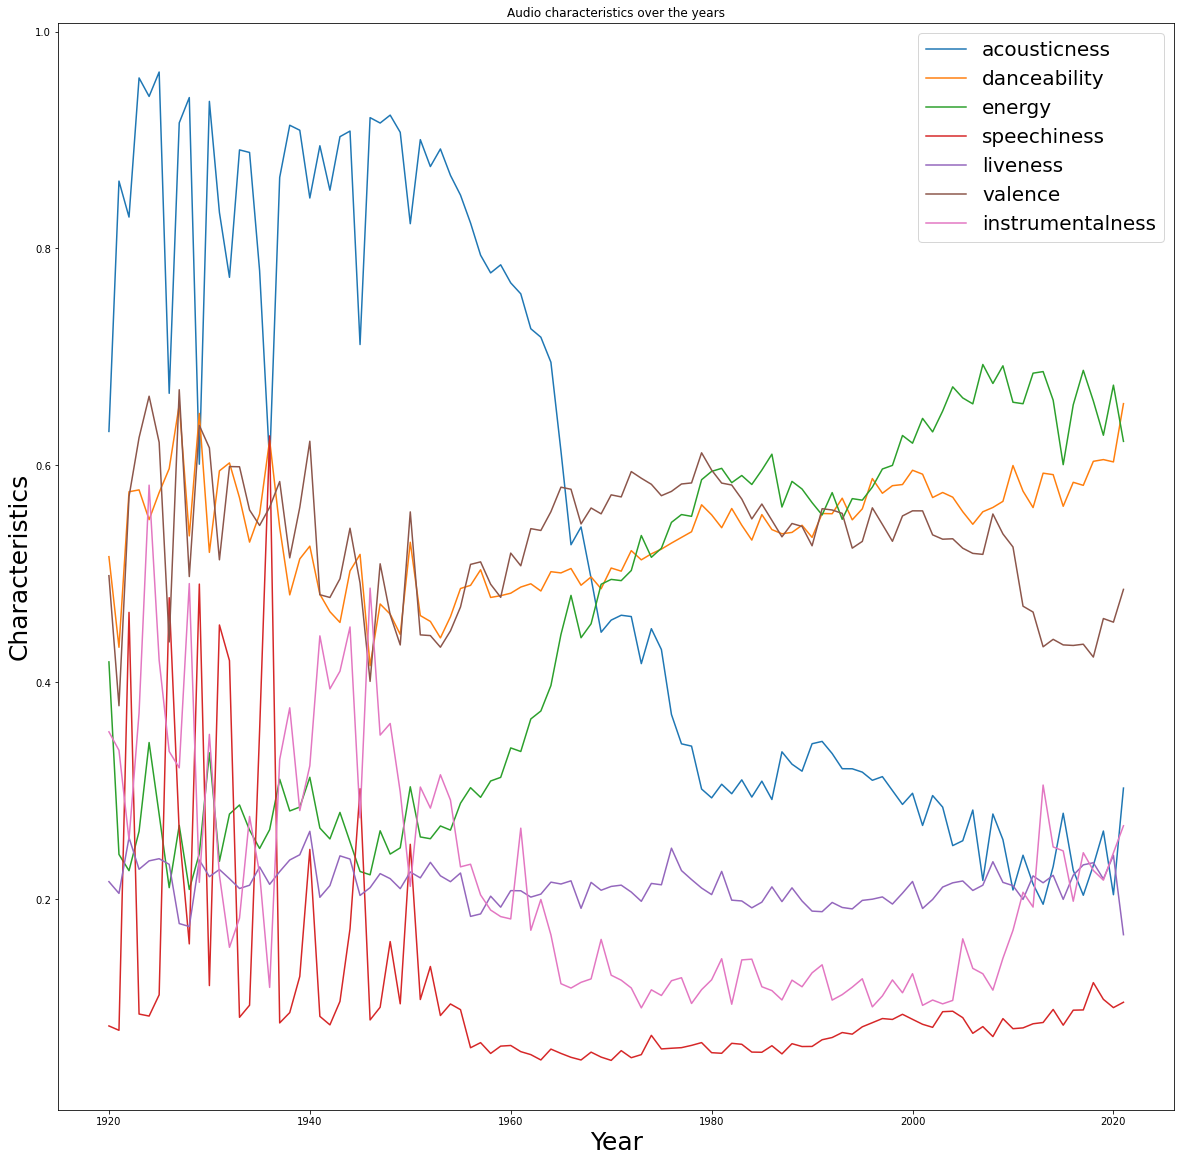

In [46]:
plt.figure(figsize=(20,20))
for i in ['acousticness','danceability','energy','speechiness','liveness','valence', 'instrumentalness']:
    y = spotify_df.groupby('year')[i].mean()
    sns.lineplot(y.index,y,label=i)
plt.title('Audio characteristics over the years')
plt.xlabel('Year',fontsize=25)
plt.ylabel('Characteristics',fontsize=25)
plt.legend( prop={'size': 20},loc = 'upper right')
plt.show()

C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


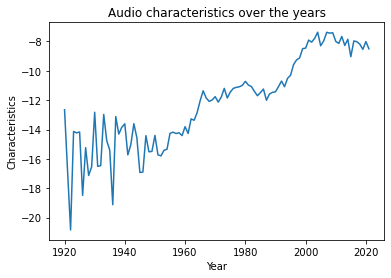

In [45]:
x1 = spotify_df.groupby('year')['loudness'].mean()
sns.lineplot(x1.index,x1)
plt.title('Audio characteristics over the years')
plt.xlabel('Year')
plt.ylabel('Characteristics')
plt.show()

C:\Users\sai\Anaconda3\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


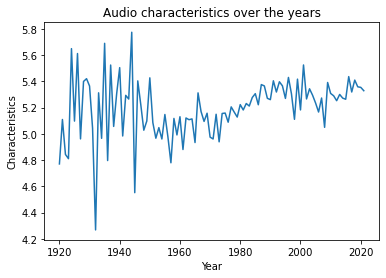

In [44]:
x2 = spotify_df.groupby('year')['key'].mean()
sns.lineplot(x2.index,x2)
plt.title('Audio characteristics over the years')
plt.xlabel('Year')
plt.ylabel('Characteristics')
plt.show()

In the exploratory data analysis, I have dome the correlation cofficient plot and barplot of all the features present in the data and found out that, 'energy-loudness','danceability-valence' had higher correlation values, which can tell us that, these parameters will be most likely be useful in predicting the next song/artist track (when the data is trained using supervised learning). Also, to look at the outliers, I have plotted boxr plot and found that liveness, speechiness, loudness and tempo had outliers present in them. I have did a bar plot for the most popular name of tracks  and artists names based on popularity. I plotted the characteristics of all the features based on years (from 1920-2021) and found out that acousticness has dropped over the years,whereas energy, danceability, loudness has increased. I also did PCA analysis on the features and found out that using cumulative variance ratio, valence and acousticness contirbuted around 97.5% of the variance, and using the first four valence, acousticness, danceability, and energy contributed around 99.9% of the variance, which tells us that these are the most important features in our dataset.